<a href="https://colab.research.google.com/github/xiaobo-fu/handson-ml/blob/master/03_font_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
from PIL import Image
from matplotlib import pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "/content/gdrive/My Drive/G/ML/data/font_transfer"
CHAPTER_ID = "03_font_transfer"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if not os.path.isdir(IMAGES_PATH):
        os.makedirs(IMAGES_PATH)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
#import warnings
#warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
original = np.load('/content/gdrive/My Drive/G/ML/data/font_transfer/original.npy')
target = np.load('/content/gdrive/My Drive/G/ML/data/font_transfer/target.npy')

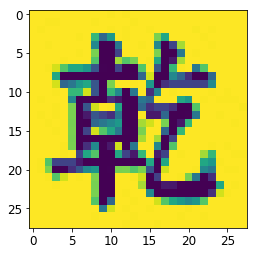

In [18]:
imgplot = plt.imshow(target[0].reshape(28,28))


In [20]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(original , target)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(original, target)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [0]:
lin_scores = cross_val_score(lin_reg, original, target, scoring="neg_mean_squared_error", cv=20)
lin_rmse_scores = np.sqrt(-lin_scores)
#display_scores(lin_rmse_scores)

In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, original, target,
scoring="neg_mean_squared_error", cv=3)
rmse_scores = np.sqrt(-scores)


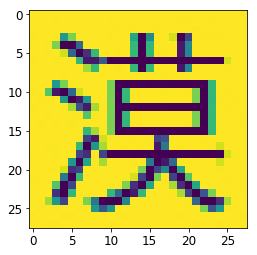

In [25]:
a = plt.imshow(original[100].reshape(28,28))

In [0]:
a = np.random.randint(0, 100, size=(1, 784))

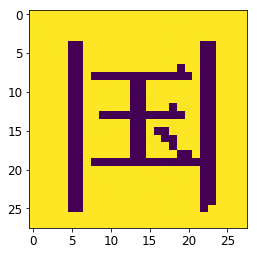

In [37]:
img = Image.open("/content/gdrive/My Drive/G/ML/data/font_transfer/2.jpg")
a = np.array(img).reshape(1,784)
plt.imshow(a.reshape(28,28))

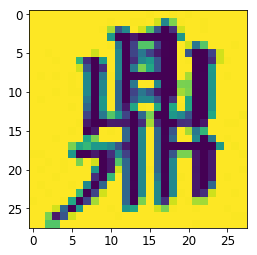

In [38]:
b = plt.imshow((tree_reg.predict(a)).reshape(28,28))

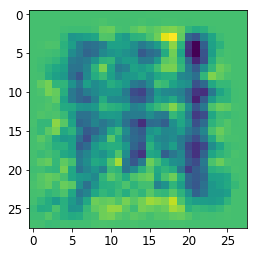

In [42]:
b = plt.imshow(lin_reg.predict(a).reshape(28,28))

In [0]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(verbose=1)
forest_reg.fit(original, target)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [0]:
b = plt.imshow(forest_reg.predict(a).reshape(28,28))

In [0]:
scores = cross_val_score(forest_reg, original, target,
scoring="neg_mean_squared_error", cv=10,verbose=1)

In [0]:
b = plt.imshow(forest_reg.predict(a).reshape(28,28))